In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pyperclip
import pandas as pd
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
import time
import pyautogui
from datetime import date
import os
import xlrd
from pandas.io.formats import style
import matplotlib as plt
import numpy as np

# Inputs

Na célula a seguir, insira as datas inicial e final do período a constar no relatório (no formato dd/mm/aaaa) e o mês ao qual o relatório corresponde (por extenso).

In [2]:
#Setar parâmetros
data_inicial = str(input('Data Inicial:'))
data_final = str(input('Data Final:'))
mes_relatorio = str(input('Mês:'))
data = date.today()
ano = data.strftime('%Y')
mes = data.strftime('%m')
dia = data.strftime('%d')

Data Inicial:01/01/2023
Data Final:31/01/2023
Mês:Janeiro


In [3]:
s = 0

while(s >= 0):
    if(s==0):
    #Chegar na busca
        nav = webdriver.Chrome()
        nav.get(r'https://portalsinopress.com.br/sgc/identificador.php?_anterior=https%3A%2F%2Fportalsinopress.com.br%2Fsgc%2Findex.php%3F')
        nav.find_element('xpath', '//*[@id="_email"]').send_keys('EMAIL', Keys.TAB)
        nav.find_element('xpath', '//*[@id="_senha"]').send_keys('SENHA', Keys.ENTER)
        nav.find_element('xpath', '//*[@id="moldura_meio_menu"]/a[1]/img').click()
        time.sleep(3)

        #Seleções - BHN
        select_element = nav.find_element('name', '_id_pessoa')
        select = Select(select_element)
        select.select_by_visible_text('BLACKHAWK NETWORK')
        time.sleep(3)
        select_element = nav.find_element('name', '_id_classificacao')
        select = Select(select_element)
        select.select_by_visible_text('Blackhawk Network')
        nav.find_element('xpath', '//*[@id="formulario_busca_avancada"]/span[2]/label[2]').click()

        #Inserção de parâmetros padrão
        nav.find_element('xpath', '//*[@id="_busca_data_inicial"]').send_keys(data_inicial)
        nav.find_element('xpath', '//*[@id="_busca_data_final"]').send_keys(data_final)
        time.sleep(3)
        nav.find_element('xpath', '//*[@id="formulario_busca_avancada"]/a/img').click()
        time.sleep(4)
        nav.find_element('xpath', '//*[@id="formulario_conteiner_clipping"]/div[2]/label/span').click()
        time.sleep(3)
        nav.find_element('xpath', '//*[@id="receptor_detalhe_meio"]/div[3]/form[2]/input[5]').click()
        time.sleep(5)
        nav.switch_to.window(nav.window_handles[1])
        nav.find_element('xpath', '/html/body/form/label[1]').click()
        nav.find_element('xpath', '/html/body/form/label[8]').click()
        nav.find_element('xpath', '/html/body/form/label[9]').click()
        nav.find_element('xpath', '/html/body/form/label[37]').click()
        nav.find_element('xpath', '/html/body/form/label[3]').click()
        nav.find_element('xpath', '/html/body/form/label[10]').click()
        nav.find_element('xpath', '/html/body/form/label[18]').click()
        nav.find_element('xpath', '/html/body/form/label[16]').click()
        nav.find_element('xpath', '/html/body/form/label[4]').click()
        nav.find_element('xpath', '/html/body/form/label[12]').click()
        nav.find_element('xpath', '/html/body/form/label[17]').click()
        nav.find_element('xpath', '/html/body/form/input[5]').click()

        time.sleep(5)
        nav.quit()
        
        #Arrumar a tabela
        nome = f'relatorio_{dia}_{mes}_{ano}.xls'

        dir = r'C:\Users\Diogo\Downloads'
        old_file = os.path.join(dir, nome)
        new_file = os.path.join(dir, f'Dados de clipping.xls')

        os.rename(old_file, new_file)

        df = xlrd.open_workbook(r"C:\Users\Diogo\Downloads\Dados de clipping.xls", formatting_info=True, ignore_workbook_corruption=True)
        df = pd.read_excel(df)
        df.to_csv(r'C:\Users\Diogo\Downloads\teste.csv')
        df = pd.read_csv(r'C:\Users\Diogo\Downloads\teste.csv')

        df['Retorno de mídia'] = df['Retorno de mídia'].astype(str)
        df['Retorno de mídia'] = df['Retorno de mídia'].str.replace('.', '')
        df['Retorno de mídia'] = df['Retorno de mídia'].str.replace(',', '.')
        df['Retorno de mídia'] = df['Retorno de mídia'].astype(float)

        df = df.drop('Unnamed: 0', axis=1)

        audiencia_BHN = df['Audiência'].sum()
        valoracao_BHN = df['Retorno de mídia'].sum()
        materias_BHN = len(df.index)
        df = df.append({'Título': 'TOTAL', 'Audiência': audiencia_BHN, 'Retorno de mídia': valoracao_BHN}, ignore_index=True)

        df = pd.io.formats.style.Styler(df, decimal = ',', thousands = '.')

        df.to_excel(r'C:\Users\Diogo\Downloads\provisorio.xlsx')

        #Nomear final
        nome = f'Dados de clipping - BHN - {mes_relatorio} de {ano}.xls'

        dir = r'C:\Users\Diogo\Downloads'
        old_file = os.path.join(dir, 'provisorio.xlsx')
        new_file = os.path.join(dir, nome)

        os.rename(old_file, new_file)
        os.remove(r"C:\Users\Diogo\Downloads\teste.csv")
        os.remove(r"C:\Users\Diogo\Downloads\Dados de clipping.xls")

        s += 1
    
    if(s==1):
    #Chegar na busca
        nav = webdriver.Chrome()
        nav.get(r'https://portalsinopress.com.br/sgc/identificador.php?_anterior=https%3A%2F%2Fportalsinopress.com.br%2Fsgc%2Findex.php%3F')
        nav.find_element('xpath', '//*[@id="_email"]').send_keys('EMAIL', Keys.TAB)
        nav.find_element('xpath', '//*[@id="_senha"]').send_keys('SENHA', Keys.ENTER)
        nav.find_element('xpath', '//*[@id="moldura_meio_menu"]/a[1]/img').click()
        time.sleep(3)

        #Seleções - BHN
        select_element = nav.find_element('name', '_id_pessoa')
        select = Select(select_element)
        select.select_by_visible_text('BLACKHAWK NETWORK')
        time.sleep(3)
        select_element = nav.find_element('name', '_id_classificacao')
        select = Select(select_element)
        select.select_by_visible_text('INCOMM')
        nav.find_element('xpath', '//*[@id="formulario_busca_avancada"]/span[2]/label[2]').click()

        #Inserção de parâmetros padrão
        nav.find_element('xpath', '//*[@id="_busca_data_inicial"]').send_keys(data_inicial)
        nav.find_element('xpath', '//*[@id="_busca_data_final"]').send_keys(data_final)
        time.sleep(3)
        nav.find_element('xpath', '//*[@id="formulario_busca_avancada"]/a/img').click()
        time.sleep(4)
        nav.find_element('xpath', '//*[@id="formulario_conteiner_clipping"]/div[2]/label/span').click()
        time.sleep(3)
        nav.find_element('xpath', '//*[@id="receptor_detalhe_meio"]/div[3]/form[2]/input[5]').click()
        time.sleep(5)
        nav.switch_to.window(nav.window_handles[1])
        nav.find_element('xpath', '/html/body/form/label[1]').click()
        nav.find_element('xpath', '/html/body/form/label[8]').click()
        nav.find_element('xpath', '/html/body/form/label[9]').click()
        nav.find_element('xpath', '/html/body/form/label[37]').click()
        nav.find_element('xpath', '/html/body/form/label[3]').click()
        nav.find_element('xpath', '/html/body/form/label[10]').click()
        nav.find_element('xpath', '/html/body/form/label[18]').click()
        nav.find_element('xpath', '/html/body/form/label[16]').click()
        nav.find_element('xpath', '/html/body/form/label[4]').click()
        nav.find_element('xpath', '/html/body/form/label[12]').click()
        nav.find_element('xpath', '/html/body/form/label[17]').click()
        nav.find_element('xpath', '/html/body/form/input[5]').click()

        time.sleep(5)
        nav.quit()
        
        #Arrumar a tabela
        nome = f'relatorio_{dia}_{mes}_{ano}.xls'

        dir = r'C:\Users\Diogo\Downloads'
        old_file = os.path.join(dir, nome)
        new_file = os.path.join(dir, f'Dados de clipping.xls')

        os.rename(old_file, new_file)

        df = xlrd.open_workbook(r"C:\Users\Diogo\Downloads\Dados de clipping.xls", formatting_info=True, ignore_workbook_corruption=True)
        df = pd.read_excel(df)
        df.to_csv(r'C:\Users\Diogo\Downloads\teste.csv')
        df = pd.read_csv(r'C:\Users\Diogo\Downloads\teste.csv')

        df['Retorno de mídia'] = df['Retorno de mídia'].astype(str)
        df['Retorno de mídia'] = df['Retorno de mídia'].str.replace('.', '')
        df['Retorno de mídia'] = df['Retorno de mídia'].str.replace(',', '.')
        df['Retorno de mídia'] = df['Retorno de mídia'].astype(float)

        df = df.drop('Unnamed: 0', axis=1)

        audiencia_Incomm = df['Audiência'].sum()
        valoracao_Incomm = df['Retorno de mídia'].sum()
        materias_Incomm = len(df.index)
        df = df.append({'Título': 'TOTAL', 'Audiência': audiencia_Incomm, 'Retorno de mídia': valoracao_Incomm}, ignore_index=True)

        df = pd.io.formats.style.Styler(df, decimal = ',', thousands = '.')

        df.to_excel(r'C:\Users\Diogo\Downloads\provisorio.xlsx')

        #Nomear final
        nome = f'Dados de clipping - Incomm - {mes_relatorio} de {ano}.xls'

        dir = r'C:\Users\Diogo\Downloads'
        old_file = os.path.join(dir, 'provisorio.xlsx')
        new_file = os.path.join(dir, nome)

        os.rename(old_file, new_file)
        os.remove(r"C:\Users\Diogo\Downloads\teste.csv")
        os.remove(r"C:\Users\Diogo\Downloads\Dados de clipping.xls")

        s += 1
        
    if(s==2):
    #Chegar na busca
        nav = webdriver.Chrome()
        nav.get(r'https://portalsinopress.com.br/sgc/identificador.php?_anterior=https%3A%2F%2Fportalsinopress.com.br%2Fsgc%2Findex.php%3F')
        nav.find_element('xpath', '//*[@id="_email"]').send_keys('EMAIL', Keys.TAB)
        nav.find_element('xpath', '//*[@id="_senha"]').send_keys('SENHA', Keys.ENTER)
        nav.find_element('xpath', '//*[@id="moldura_meio_menu"]/a[1]/img').click()
        time.sleep(3)

        #Seleções - BHN
        select_element = nav.find_element('name', '_id_pessoa')
        select = Select(select_element)
        select.select_by_visible_text('BLACKHAWK NETWORK')
        time.sleep(3)
        select_element = nav.find_element('name', '_id_classificacao')
        select = Select(select_element)
        select.select_by_visible_text('EPAY')
        nav.find_element('xpath', '//*[@id="formulario_busca_avancada"]/span[2]/label[2]').click()

        #Inserção de parâmetros padrão
        nav.find_element('xpath', '//*[@id="_busca_data_inicial"]').send_keys(data_inicial)
        nav.find_element('xpath', '//*[@id="_busca_data_final"]').send_keys(data_final)
        time.sleep(3)
        nav.find_element('xpath', '//*[@id="formulario_busca_avancada"]/a/img').click()
        time.sleep(4)
        nav.find_element('xpath', '//*[@id="formulario_conteiner_clipping"]/div[2]/label/span').click()
        time.sleep(3)
        nav.find_element('xpath', '//*[@id="receptor_detalhe_meio"]/div[3]/form[2]/input[5]').click()
        time.sleep(5)
        nav.switch_to.window(nav.window_handles[1])
        nav.find_element('xpath', '/html/body/form/label[1]').click()
        nav.find_element('xpath', '/html/body/form/label[8]').click()
        nav.find_element('xpath', '/html/body/form/label[9]').click()
        nav.find_element('xpath', '/html/body/form/label[37]').click()
        nav.find_element('xpath', '/html/body/form/label[3]').click()
        nav.find_element('xpath', '/html/body/form/label[10]').click()
        nav.find_element('xpath', '/html/body/form/label[18]').click()
        nav.find_element('xpath', '/html/body/form/label[16]').click()
        nav.find_element('xpath', '/html/body/form/label[4]').click()
        nav.find_element('xpath', '/html/body/form/label[12]').click()
        nav.find_element('xpath', '/html/body/form/label[17]').click()
        nav.find_element('xpath', '/html/body/form/input[5]').click()

        time.sleep(5)
        nav.quit()
        
        #Arrumar a tabela
        nome = f'relatorio_{dia}_{mes}_{ano}.xls'

        dir = r'C:\Users\Diogo\Downloads'
        old_file = os.path.join(dir, nome)
        new_file = os.path.join(dir, f'Dados de clipping.xls')

        os.rename(old_file, new_file)

        df = xlrd.open_workbook(r"C:\Users\Diogo\Downloads\Dados de clipping.xls", formatting_info=True, ignore_workbook_corruption=True)
        df = pd.read_excel(df)
        df.to_csv(r'C:\Users\Diogo\Downloads\teste.csv')
        df = pd.read_csv(r'C:\Users\Diogo\Downloads\teste.csv')

        df['Retorno de mídia'] = df['Retorno de mídia'].astype(str)
        df['Retorno de mídia'] = df['Retorno de mídia'].str.replace('.', '')
        df['Retorno de mídia'] = df['Retorno de mídia'].str.replace(',', '.')
        df['Retorno de mídia'] = df['Retorno de mídia'].astype(float)

        df = df.drop('Unnamed: 0', axis=1)

        audiencia_epay = df['Audiência'].sum()
        valoracao_epay = df['Retorno de mídia'].sum()
        materias_epay = len(df.index)
        df = df.append({'Título': 'TOTAL', 'Audiência': audiencia_epay, 'Retorno de mídia': valoracao_epay}, ignore_index=True)

        df = pd.io.formats.style.Styler(df, decimal = ',', thousands = '.')

        df.to_excel(r'C:\Users\Diogo\Downloads\provisorio.xlsx')

        #Nomear final
        nome = f'Dados de clipping - Epay - {mes_relatorio} de {ano}.xls'

        dir = r'C:\Users\Diogo\Downloads'
        old_file = os.path.join(dir, 'provisorio.xlsx')
        new_file = os.path.join(dir, nome)

        os.rename(old_file, new_file)
        os.remove(r"C:\Users\Diogo\Downloads\teste.csv")
        os.remove(r"C:\Users\Diogo\Downloads\Dados de clipping.xls")

        s = -1

C:\Users\Diogo\AppData\Local\Temp\ipykernel_57792\3783645133.py:65: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Retorno de mídia'] = df['Retorno de mídia'].str.replace('.', '')
C:\Users\Diogo\AppData\Local\Temp\ipykernel_57792\3783645133.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Título': 'TOTAL', 'Audiência': audiencia_BHN, 'Retorno de mídia': valoracao_BHN}, ignore_index=True)
C:\Users\Diogo\AppData\Local\Temp\ipykernel_57792\3783645133.py:154: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Retorno de mídia'] = df['Retorno de mídia'].str.replace('.', 

In [4]:
dados = [['BHN', valoracao_BHN, audiencia_BHN, materias_BHN],
        ['Incomm', valoracao_Incomm, audiencia_Incomm, materias_Incomm],
        ['Epay', valoracao_epay, audiencia_epay, materias_epay]]

df = pd.DataFrame(dados, columns=['Empresa', 'Valoração', 'Audiência', 'Matérias'])

df['Audiência'] = df['Audiência'].astype(float)
    
display(df)

,Empresa,Valoração,Audiência,Matérias
0,BHN,296345.45,312755.0,17
1,Incomm,1362489.01,359713.0,3
2,Epay,842067.70,801536.0,7


# Gráficos

A partir daqui, serão plotados os gráficos com comparativos dos dados principais do clipping. Basta copiá-los e inserir na apresentação do relatório. 

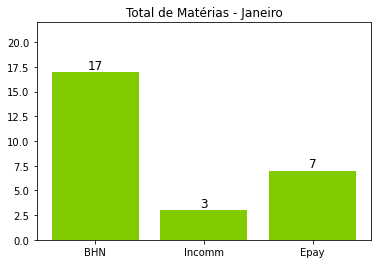

In [5]:
fig, ax = plt.pyplot.subplots()

p1 = ax.bar(df['Empresa'], df['Matérias'], color = '#80CC00')

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='edge', size = 12)
ax.set_ylim([0, df['Matérias'].max() + 5])
plt.pyplot.title(f'Total de Matérias - {mes_relatorio}')

plt.pyplot.show()

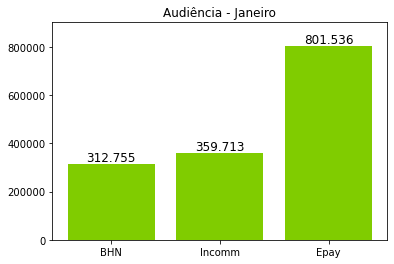

In [6]:
audiência = df['Audiência'].tolist()
labels = []
for i in [0, 1, 2]:
    label = f'{audiência[i]:_.0f}'
    label = label.replace('.', ',').replace('_', '.')
    labels.append(label)

fig, ax = plt.pyplot.subplots()

p1 = ax.bar(df['Empresa'], df['Audiência'], color = '#80CC00')

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, labels = labels, label_type='edge', size = 12)
ax.set_ylim([0, df['Audiência'].max() + 100000])
plt.pyplot.title(f'Audiência - {mes_relatorio}')

plt.pyplot.show()

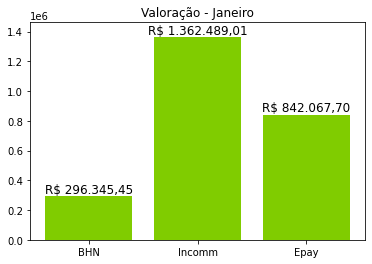

In [7]:
fig, ax = plt.pyplot.subplots()

p1 = ax.bar(df['Empresa'], df['Valoração'], color = '#80CC00')

plt.pyplot.title(f'Valoração - {mes_relatorio}')
ax.set_ylim([0, df['Valoração'].max() + 100000])

#Ajeitar labels
valoração = df['Valoração'].tolist()
labels = []
for i in [0, 1, 2]:
    label = f'{valoração[i]:_.2f}'
    label = label.replace('.', ',').replace('_', '.')
    label = 'R$ ' + label
    labels.append(label)

ax.bar_label(p1, labels = labels, label_type='edge', size = 12)
   
df['Valoração'] = df['Valoração'].astype(float)

plt.pyplot.show()

In [8]:
df = pd.read_excel(r"C:\Users\Diogo\Downloads\Dados para graficos Python.xlsx")
df = df.drop('Unnamed: 0', axis=1)
df = df.append({'Audiência BHN': audiencia_BHN, 'Audiência Epay': audiencia_epay, 'Audiência Incomm': audiencia_Incomm,
               'Valoração BHN': valoracao_BHN, 'Valoração Epay': valoracao_epay, 'Valoração Incomm': valoracao_Incomm,
               'Matérias BHN': materias_BHN, 'Matérias Epay': materias_epay, 'Matérias Incomm': materias_Incomm}, ignore_index=True)
display(df)

C:\Users\Diogo\AppData\Local\Temp\ipykernel_57792\2721739079.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Audiência BHN': audiencia_BHN, 'Audiência Epay': audiencia_epay, 'Audiência Incomm': audiencia_Incomm,


,Audiência BHN,Audiência Epay,Audiência Incomm,Valoração BHN,Valoração Epay,Valoração Incomm,Matérias BHN,Matérias Epay,Matérias Incomm
0,312755.0,801536.0,359713.0,296345.45,842067.7,1362489.01,17.0,7.0,3.0


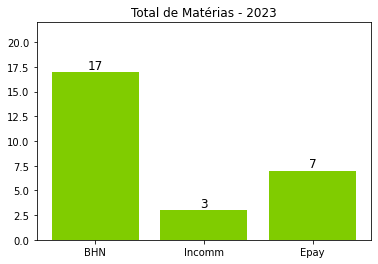

In [9]:
empresas = ['BHN', 'Incomm', 'Epay']
matérias = [df['Matérias BHN'].sum(), df['Matérias Incomm'].sum(), df['Matérias Epay'].sum()]

fig, ax = plt.pyplot.subplots()

p1 = ax.bar(empresas, matérias, color = '#80CC00')

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='edge', size = 12)
ax.set_ylim([0, (max(matérias) + 5)])
plt.pyplot.title(f'Total de Matérias - {ano}')

plt.pyplot.show()

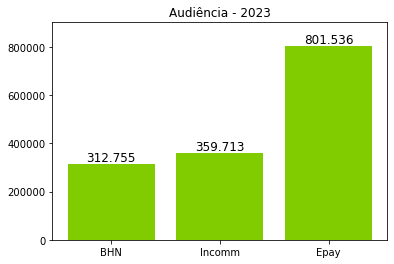

In [10]:
empresas = ['BHN', 'Incomm', 'Epay']
audiência = [df['Audiência BHN'].sum(), df['Audiência Incomm'].sum(), df['Audiência Epay'].sum()]
labels = []
for i in [0, 1, 2]:
    label = f'{audiência[i]:_.0f}'
    label = label.replace('.', ',').replace('_', '.')
    labels.append(label)

fig, ax = plt.pyplot.subplots()

p1 = ax.bar(empresas, audiência, color = '#80CC00')

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, labels = labels, label_type='edge', size = 12)
ax.set_ylim([0, (max(audiência) + 100000)])
plt.pyplot.title(f'Audiência - {ano}')

plt.pyplot.show()

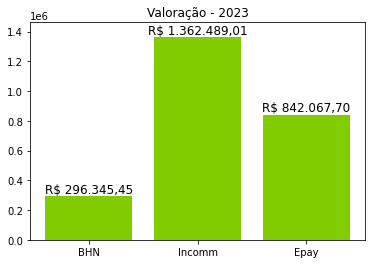

In [11]:
empresas = ['BHN', 'Incomm', 'Epay']
valoração = [df['Valoração BHN'].sum(), df['Valoração Incomm'].sum(), df['Valoração Epay'].sum()]

dados = [[empresas[0], valoração[0]],
        [empresas[1], valoração[1]],
        [empresas[2], valoração[2]]]

df2 = pd.DataFrame(dados, columns = ['empresas', 'valoração'])

df2.style.format(thousands = '.', decimal = ',')

fig, ax = plt.pyplot.subplots()

p1 = ax.bar(df2['empresas'], df2['valoração'], color = '#80CC00')
ax.set_ylim([0, (max(valoração) + 100000)])
plt.pyplot.title(f'Valoração - {ano}')

#Ajeitar labels
labels = []
for i in [0, 1, 2]:
    label = f'{valoração[i]:_.2f}'
    label = label.replace('.', ',').replace('_', '.')
    label = 'R$ ' + label
    labels.append(label)
    
ax.bar_label(p1, labels = labels, label_type='edge', size = 12)

plt.pyplot.show()

In [12]:
mes = int(mes) - 1
mes = '{:0>2}'.format(mes)
print(mes)

01


# Upload

A célula a seguir faz upload dos arquivos gerados no repositório da empresa. Ao rodá-la, lembre-se de abrir a nova janela do Google que será criada e não mexa no mouse ou teclado até que a janela se feche.

In [15]:
#Upload dados de clipping
nav = webdriver.Chrome()
nav.get(r'https://intercomamericas.app.box.com/folder/0')
nav.find_element('xpath', '//*[@id="login-email"]').send_keys('EMAIL', Keys.ENTER)
nav.find_element('xpath', '//*[@id="password-login"]').send_keys(r'SENHA', Keys.ENTER)
nav.get(r'https://intercomamericas.app.box.com/folder/185246967095')
time.sleep(5)
nav.find_element('xpath', '//*[@id="menubutton20"]').click()
nav.find_element('xpath', '//*[@id="menu19"]/div/div[2]/div/li[3]/span').click()
time.sleep(2)
nav.find_element('xpath', '/html/body/div[5]/div/div[2]/div/div[2]/form/div[1]/label/input').send_keys(f'{mes}. {mes_relatorio}', Keys.ENTER)
nav.find_element('xpath', '/html/body/div[5]/div/div[2]/div/div[2]/form/div[3]/button[2]').click()
time.sleep(10)
nav.find_element('xpath', '//*[@id="contextmenutarget232"]/div/div[2]/div/div[1]/div[1]/div/a').click()
time.sleep(10)
nav.find_element('xpath', '//*[@id="menubutton328"]/span/div/span/span').click()
time.sleep(5)
nav.find_element('xpath', '//*[@id="menu299"]/span/li/span').click()
time.sleep(5)
pyperclip.copy(r'C:\Users\Diogo\Downloads\Dados de clipping - BHN - {} de {}'.format(mes_relatorio, ano))
pyautogui.click(x=480, y=530)
pyautogui.hotkey('ctrl', 'v')
pyautogui.press('enter')

time.sleep(15)
nav.find_element('xpath', '//*[@id="menubutton282"]/span/div').click()
time.sleep(3)
nav.find_element('xpath', '//*[@id="menu281"]/div/div[2]/div/span/li/span').click()
time.sleep(5)
pyperclip.copy(r'C:\Users\Diogo\Downloads\Dados de clipping - Incomm - {} de {}'.format(mes_relatorio, ano))
pyautogui.click(x=480, y=530)
pyautogui.hotkey('ctrl', 'v')
pyautogui.press('enter')

time.sleep(15)
nav.find_element('xpath', '//*[@id="menubutton282"]/span/div').click()
time.sleep(3)
nav.find_element('xpath', '//*[@id="menu281"]/div/div[2]/div/span/li/span').click()
time.sleep(5)
pyperclip.copy(r'C:\Users\Diogo\Downloads\Dados de clipping - Epay - {} de {}'.format(mes_relatorio, ano))
pyautogui.click(x=480, y=530)
pyautogui.hotkey('ctrl', 'v')
pyautogui.press('enter')
time.sleep(15)

#Upload dos dados de gráficos atualizados
df.to_excel(r'C:\Users\Diogo\Downloads\Dados para graficos Python.xlsx')
nav.get(r'https://intercomamericas.app.box.com/folder/185246967095')
time.sleep(3)
nav.find_element('xpath', '//*[@id="menubutton20"]/span/div/span').click()
time.sleep(3)
nav.find_element('xpath', '//*[@id="menu19"]/div/div[2]/div/span/li/span').click()
time.sleep(5)
pyperclip.copy(r'C:\Users\Diogo\Downloads\Dados para graficos Python.xlsx')
pyautogui.click(x=480, y=530)
pyautogui.hotkey('ctrl', 'v')
pyautogui.press('enter')

time.sleep(15)
nav.quit()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="menubutton300"]/span/div/span/span"}
  (Session info: chrome=109.0.5414.75)
Stacktrace:
Backtrace:
	(No symbol) [0x00816643]
	(No symbol) [0x007ABE21]
	(No symbol) [0x006ADA9D]
	(No symbol) [0x006E1342]
	(No symbol) [0x006E147B]
	(No symbol) [0x00718DC2]
	(No symbol) [0x006FFDC4]
	(No symbol) [0x00716B09]
	(No symbol) [0x006FFB76]
	(No symbol) [0x006D49C1]
	(No symbol) [0x006D5E5D]
	GetHandleVerifier [0x00A8A142+2497106]
	GetHandleVerifier [0x00AB85D3+2686691]
	GetHandleVerifier [0x00ABBB9C+2700460]
	GetHandleVerifier [0x008C3B10+635936]
	(No symbol) [0x007B4A1F]
	(No symbol) [0x007BA418]
	(No symbol) [0x007BA505]
	(No symbol) [0x007C508B]
	BaseThreadInitThunk [0x76756BD9+25]
	RtlGetFullPathName_UEx [0x77AC8FD2+1218]
	RtlGetFullPathName_UEx [0x77AC8F9D+1165]
